Build an AI model that can classify SMS messages as spam or
legitimate. Use techniques like TF-IDF or word embeddings with
classifiers like Naive Bayes, Logistic Regression, or Support Vector
Machines to identify spam messages

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
df=pd.read_csv('/content/spam.csv',encoding='latin-1')

In [67]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3694,0,"Hello, As per request from &lt;#&gt; Rs.5 ha...",NaN,NaN,NaN
1015,0,"Dear,regret i cudnt pick call.drove down frm c...",NaN,NaN,NaN
1715,0,Asking do u knw them or nt? May be ur frnds or...,NaN,NaN,NaN
4086,1,PRIVATE! Your 2003 Account Statement for 07973...,NaN,NaN,NaN
1885,0,I think asking for a gym is the excuse for laz...,NaN,NaN,NaN


In [ ]:
df.groupby('v1').describe()

v2                                                                 \
     count unique                                                top freq   
v1                                                                          
ham   4825   4516                             Sorry, I'll call later   30   
spam   747    653  Please call our customer service representativ...    4   

     Unnamed: 2                                                            \
          count unique                                                top   
v1                                                                          
ham          45     39   bt not his girlfrnd... G o o d n i g h t . . .@"   
spam          5      4                                        PO Box 5249   

          Unnamed: 3                                    Unnamed: 4         \
     freq      count unique                    top freq      count unique   
v1                                                                          
ham     3         10      9                     GE    2          6      5   
spam    2          2      1   MK17 92H. 450Ppw 16"    2          0      0   

                    
          top freq  
v1                  
ham   GNT:-)"    2  
spam      NaN  NaN

In [ ]:
df['v1'] = df['v1'].map({'ham': 0, 'spam': 1})

In [ ]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,0,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,0,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,0,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
X = df['v2']
y = df['v1']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X_train

,v2
1978,No I'm in the same boat. Still here at my moms...
3989,(Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3935,They r giving a second chance to rahul dengra.
4078,O i played smash bros &lt;#&gt; religiously.
4086,PRIVATE! Your 2003 Account Statement for 07973...
...,...
3772,I came hostel. I m going to sleep. Plz call me...
5191,"Sorry, I'll call later"
5226,Prabha..i'm soryda..realy..frm heart i'm sory
5390,Nt joking seriously i told


In [20]:
X_train.describe()

,v2
count,4457
unique,4194
top,"Sorry, I'll call later"
freq,22


In [27]:
tf_idf_vec=TfidfVectorizer(stop_words='english')

In [28]:
X_train_tfidf = tf_idf_vec.fit_transform(X_train)
X_test_tfidf = tf_idf_vec.transform(X_test)

Naive Bayes Model

In [30]:
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [31]:
y_pred_naive_bayes = naive_bayes_model.predict(X_test_tfidf)

In [35]:
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_naive_bayes))

Naive Bayes Accuracy: 0.9668161434977578


In [37]:
print(classification_report(y_test, y_pred_naive_bayes))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



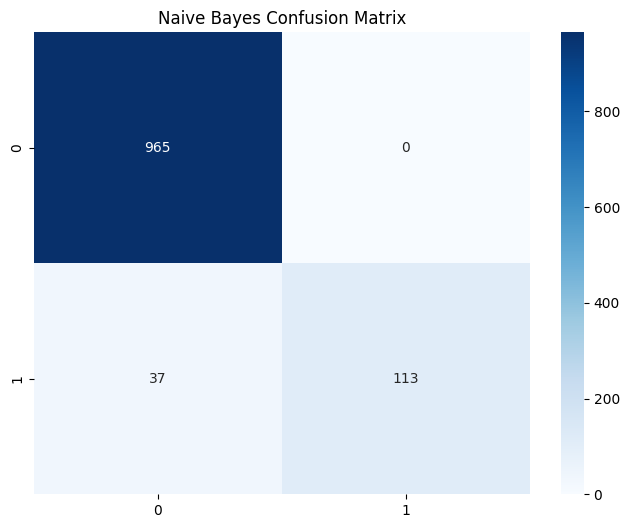

In [43]:
cm_nb = confusion_matrix(y_test, y_pred_naive_bayes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.title("Naive Bayes Confusion Matrix")
plt.show()

Logistic Regression Model

In [46]:
logistic_model=LogisticRegression()
logistic_model.fit(X_train_tfidf,y_train)

LogisticRegression()

In [47]:
y_pred_logistic = logistic_model.predict(X_test_tfidf)

In [48]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logistic))

Logistic Regression Accuracy: 0.9524663677130045


In [49]:
print(classification_report(y_test, y_pred_logistic))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.97      0.67      0.79       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115



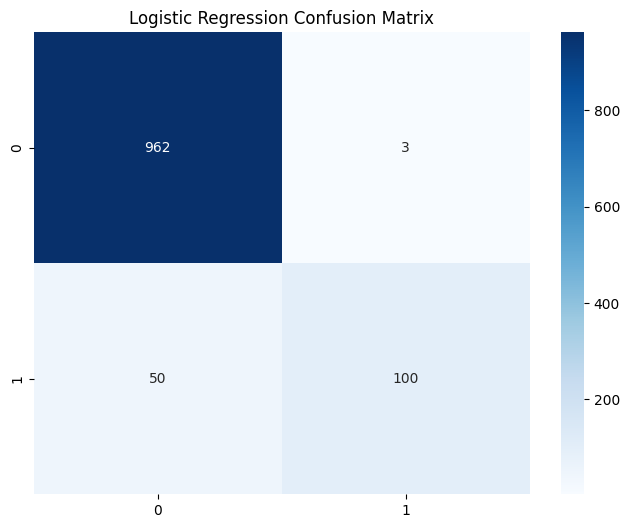

In [50]:
cm_logistic = confusion_matrix(y_test, y_pred_logistic)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.show()

Support Vector Machine Model

In [53]:
svm_model = SVC()
svm_model.fit(X_train_tfidf, y_train)

SVC()

In [54]:
y_pred_svm = svm_model.predict(X_test_tfidf)

In [56]:
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

SVM Accuracy: 0.9766816143497757


In [57]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       0.99      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



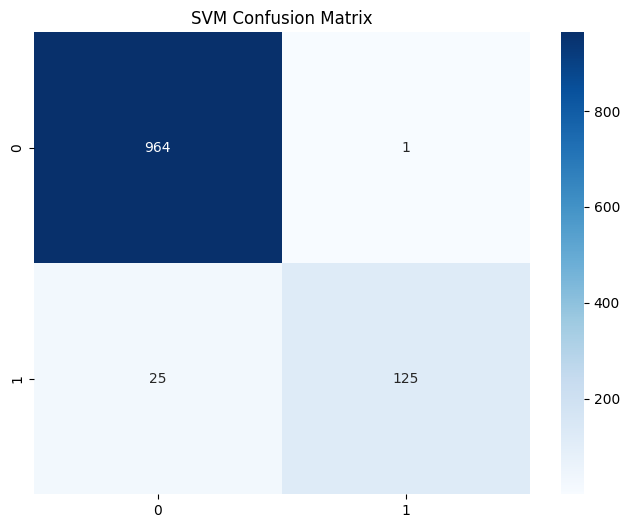

In [58]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.show()

Result

Naive Bayes Accuracy: 0.9668161434977578

Logistic Regression Accuracy: 0.9524663677130045

SVM Accuracy: 0.9766816143497757

spam detection using naive bayers model

In [59]:
sms = ["Had your mobile 11 months or more? UR entititled to update to the latest color mobile with camera for free! Call the mobile update call free 123456789"]
sms_tfidf=tf_idf_vec.transform(sms)
prediction=naive_bayes_model.predict(sms_tfidf)
print("spam" if prediction[0]==1 else "Legitimate")

spam


spam detection using logistic regression model

In [73]:
sms = ["Claim your FREE ringtone by texting STOP to 80082"]
sms_tfidf=tf_idf_vec.transform(sms)
prediction=logistic_model.predict(sms_tfidf)
print("spam" if prediction[0]==1 else "Legitimate")

spam


spam detection using support vector machine

In [74]:
sms = ["Private! Your 2003 Account Statement shows £800 unredeemed points. Call 08718738001"]
sms_tfidf=tf_idf_vec.transform(sms)
prediction=svm_model.predict(sms_tfidf)
print("spam" if prediction[0]==1 else "Legitimate")

spam
